## Intro:

One of the things which must be done: it would be nice to actually visualize the MNIST data set and the learning process. Doing so would make this notebook more rich.

In [67]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [68]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


This is my 'hello world' to ML using tensorflow.

In [69]:
# The number of pixels in each image is 784
x = tf.placeholder(tf.float32,[None,784])
# None means "a dimension can be of any length"??

In [70]:
# A variable is a modifiable tensor that lives in TensorFlow's graph
# of interacting operations. Can be used and modified by
# computation. We introduce variables for the weights and the bias. 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Ok, cannot help but make a few comments here. Softmax essentially produces a Gibbs measure to predict outputs. The "evidence" for a given output is defined via

$$ evidence_i = \sum_j W_{i,j} x_j + b_i $$

where $evidence_i$ may essentially be interpreted as the energy of the $i$th digit. Thus the matrix $W$ can be interpreted as a Hamiltonian, and the bias vector $b$ can be interpreted as a potential. The function $softmax(Wx +b)$ is then vector valued, with $i$th component given by 

$$ softmax(Wx + b)_i = \frac{ \exp((Wx + b)_i) }{ \sum_{j} exp( (Wx + b)_j )} $$ 

For brevity, we denote the sum on the denominator $Z$. Note there is no temperature parameter, but this could be inserted into the model, and it's probably worth exploring what this does.

In [71]:
# The softmax regression is defined in a single line:
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Training

We now define a cost / loss /error to be minimized. This will tell us how good or bad our model is. I think that in the context of the MIT book, this is our performance measure $P$. 

A common, nice function to work with is the $cross$-$entropy$, defined below. Below, $y$ will be predicted prob. dist, and $y'$ will be the true distribution ("the one-hot vector with the digit labels"). 

$$ H_{y'}(y) := -\sum_i y_i' \log(y_i) $$

We now add a new placeholder to input the correct answers. 

In [72]:
y_ = tf.placeholder(tf.float32,[None,10])

In [73]:
# Now we implement the cross-entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# This is a cell we should understand much better. 

"TensorFlow knows the entire graph of your computations, it can thus use the backpropagation algorithm (which is linked to, and which we should learn about) to efficiently determine how variables affect the loss = cross-entropy to be minimized. Then it can apply an optimization algorithm to modify the variables and reduce loss"

So.. backpropogation is for computing the loss, and optimization is for minimizing the loss?

In [74]:
# TensorFlow allows us to use Gradient Descent to optimize
# the cross-entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# The parameter .5 controls the "learning rate"

I have a question: what is the underlying graph that they keep speaking of?

In [75]:
# We must also create an operation to initialize 
# the variables we've created. 

init = tf.initialize_all_variables()
# note that we use the above command instead of
# tf.global_variables_initializer()  
# written in the tut

In [76]:
# Can now initiate a "Session"

sess = tf.Session()
sess.run(init)

The correct classification is...
3
The actual digit below:


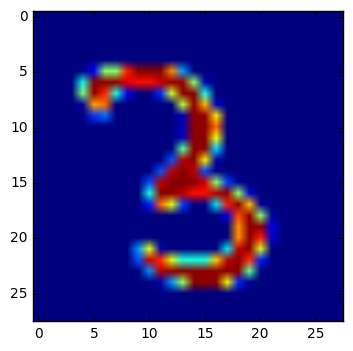

In [108]:
# Let's play here a bit:
# I want to display the randomly drawn sample. 
xs, ys = mnist.train.next_batch(1)
# imgplot = plt.imshow(np.array(xs))
# print(np.array(xs))
# I believe that we need to convert "xs" from a length 784 array into
# a 28 by 28 matrix. Is there a way to do this quickly in python?

xs_matrix = np.reshape(xs,(28,28))
imgplot = plt.imshow(np.array(xs_matrix))

# Hell yeah. 
# http://matplotlib.org/users/image_tutorial.html
print('The correct classification is...')
print(np.argmax(ys[0]))
print('The actual digit below:')

In [104]:
# We run the training step 1000 times
# in each step, we randomly sample a batch of 100 data points from
# the training set. We run the training step on this data

# Using small batches of random data is called stochastic training,
# in this case, stochastic gradient descent. Ideally, we'd like to be 
# using all of our data, but this is computationally expensive
# so we just use a different, smaller and randomly selected
# subset every time

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## Evaluating Our Model 

In [105]:
# We can use the argmax function to evaluate either the correct
# classification or the predicted classification 

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [106]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9231
